In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the dataset
df = pd.read_csv('orders.csv', na_values=['Not Available','unknown'])
df.head()

,Order Id,Order Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub Category,Product Id,cost price,List Price,Quantity,Discount Percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [3]:
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', nan, 'First Class', 'Same Day'],
      dtype=object)

In [4]:
# rename the columns 
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5


In [5]:
# adding new columns 
#1 Discount
df['discount'] = df['list_price'] * df['discount_percent']/100

#2 Sales_price
df['sales_price'] = df['list_price'] - df['discount']

#3 Profit
df['profit'] = df['sales_price'] - df['cost_price']

df.head()

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,cost_price,list_price,quantity,discount_percent,discount,sales_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,240,260,2,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,600,730,3,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,10,10,2,5,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,780,960,5,2,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,20,20,2,5,1.0,19.0,-1.0


In [6]:
# convert order date to a date datatype
df['order_date'] = pd.to_datetime(df['order_date'], format="%Y-%m-%d")
df.dtypes

order_id                     int64
order_date          datetime64[ns]
ship_mode                   object
segment                     object
country                     object
city                        object
state                       object
postal_code                  int64
region                      object
category                    object
sub_category                object
product_id                  object
cost_price                   int64
list_price                   int64
quantity                     int64
discount_percent             int64
discount                   float64
sales_price                float64
profit                     float64
dtype: object

In [7]:
# Removing columns that are no longer needed
df.drop(columns=['discount_percent','list_price','cost_price'], inplace=True)

df.head()

In [8]:
df

,order_id,order_date,ship_mode,segment,country,city,state,postal_code,region,category,sub_category,product_id,quantity,discount,sales_price,profit
0,1,2023-03-01,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,FUR-BO-10001798,2,5.2,254.8,14.8
1,2,2023-08-15,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,FUR-CH-10000454,3,21.9,708.1,108.1
2,3,2023-01-10,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,OFF-LA-10000240,2,0.5,9.5,-0.5
3,4,2022-06-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,FUR-TA-10000577,5,19.2,940.8,160.8
4,5,2022-07-13,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,OFF-ST-10000760,2,1.0,19.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2023-02-18,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,FUR-FU-10001889,3,1.2,28.8,-1.2
9990,9991,2023-03-17,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,FUR-FU-10000747,2,3.6,86.4,16.4
9991,9992,2022-08-07,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,TEC-PH-10003645,2,5.2,254.8,34.8
9992,9993,2022-11-19,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,OFF-PA-10004041,4,0.9,29.1,-0.9


In [9]:
import sqlalchemy as sal
engine = sal.create_engine('mssql://DESKTOP-LIPT3VO\SQLEXPRESS/retail?driver=ODBC+DRIVER+17+FOR+SQL+SERVER')
conn = engine.connect()

In [10]:
df.to_sql('orders', con=conn, index=False, if_exists ='replace')

-1

In [11]:
df.columns

Index(['order_id', 'order_date', 'ship_mode', 'segment', 'country', 'city',
       'state', 'postal_code', 'region', 'category', 'sub_category',
       'product_id', 'quantity', 'discount', 'sales_price', 'profit'],
      dtype='object')

In [12]:
# find top 10 hightest revenue generating product 
prt = df.groupby('product_id')['profit'].sum().sort_values(ascending=False)
prt.head(10)

product_id
TEC-CO-10004722    5644.0
TEC-MA-10002412    3624.4
OFF-BI-10003527    3435.3
TEC-CO-10001449    2631.2
FUR-CH-10002024    2246.2
OFF-BI-10001359    2080.2
OFF-BI-10000545    1959.0
OFF-BI-10001120    1695.7
OFF-BI-10004995    1654.8
FUR-BO-10004834    1614.1
Name: profit, dtype: float64

In [13]:
# find the top 5 hightest selling in each region

# Group by region and product_id, then sum the sales_price
grouped = df.groupby(['region', 'product_id'])['sales_price'].sum().reset_index()

# Sort the grouped data by region and sales_price in descending order
sorted_grouped = grouped.sort_values(by=['region', 'sales_price'], ascending=[True, False])

# Get the top 5 highest-selling products in each region
top_5_each_region = sorted_grouped.groupby('region').head(5)

top_5_each_region

,region,product_id,sales_price
1166,Central,TEC-CO-10004722,16975.0
1168,Central,TEC-MA-10000822,13770.0
488,Central,OFF-BI-10001120,11056.5
469,Central,OFF-BI-10000545,10132.7
617,Central,OFF-BI-10004995,8416.1
2556,East,TEC-CO-10004722,29099.0
2565,East,TEC-MA-10001047,13767.0
1342,East,FUR-BO-10004834,11274.1
1834,East,OFF-BI-10001359,8463.6
2548,East,TEC-CO-10001449,8316.0


In [14]:
# find month over month growth comparison for 2022 and 2023 sales eg jan 2022 vs jan 2023


# Filter data for the years 2022 and 2023
df_2022_2023 = df[df['order_date'].dt.year.isin([2022, 2023])]

# Extract month and year from order_date
df_2022_2023['year'] = df_2022_2023['order_date'].dt.year
df_2022_2023['month'] = df_2022_2023['order_date'].dt.month

# Group by year and month, summing the sales_price
monthly_sales = df_2022_2023.groupby(['year', 'month'])['sales_price'].sum().reset_index()

# Split the data into two DataFrames, one for 2022 and one for 2023
sales_2022 = monthly_sales[monthly_sales['year'] == 2022].rename(columns={'sales_price': 'sales_2022'})
sales_2023 = monthly_sales[monthly_sales['year'] == 2023].rename(columns={'sales_price': 'sales_2023'})

# Merge the 2022 and 2023 sales data on the month
merged_sales = pd.merge(sales_2022[['month', 'sales_2022']], sales_2023[['month', 'sales_2023']], on='month', how='inner')

# Calculate the growth rate for each month
merged_sales['growth_rate'] = (merged_sales['sales_2023'] - merged_sales['sales_2022']) / merged_sales['sales_2022'] * 100

merged_sales

,month,sales_2022,sales_2023,growth_rate
0,1,94712.5,88632.6,-6.419322
1,2,90091.0,128124.2,42.216426
2,3,80106.0,82512.3,3.003895
3,4,95451.6,111568.6,16.884997
4,5,79448.3,86447.9,8.810258
5,6,94170.5,68976.5,-26.753601
6,7,78652.2,90563.8,15.144649
7,8,104808.0,87733.6,-16.291123
8,9,79142.2,76658.6,-3.138149
9,10,118912.7,121061.5,1.807040


In [15]:
# for each category which month had hightest sales

# Extract month and year from order_date
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Group by category and month, summing the sales_price
category_monthly_sales = df.groupby(['category', 'year', 'month'])['sales_price'].sum().reset_index()

# Identify the month with the highest sales for each category
idx = category_monthly_sales.groupby(['category'])['sales_price'].idxmax()
highest_sales_per_category = category_monthly_sales.loc[idx]

highest_sales_per_category

,category,year,month,sales_price
9,Furniture,2022,10,42888.9
37,Office Supplies,2023,2,44118.5
69,Technology,2023,10,53000.1


In [16]:
# which sub category had hightest growth by profit in 2023 compare to 2022

# Filter data for the years 2022 and 2023
df_2022_2023 = df[df['order_date'].dt.year.isin([2022, 2023])]

# Extract year from order_date
df_2022_2023['year'] = df_2022_2023['order_date'].dt.year

# Group by sub-category and year, summing the profit
sub_category_profit = df_2022_2023.groupby(['sub_category', 'year'])['profit'].sum().reset_index()

# Split the data into two DataFrames, one for 2022 and one for 2023
profit_2022 = sub_category_profit[sub_category_profit['year'] == 2022].rename(columns={'profit': 'profit_2022'})
profit_2023 = sub_category_profit[sub_category_profit['year'] == 2023].rename(columns={'profit': 'profit_2023'})

# Merge the 2022 and 2023 profit data on sub-category
merged_profit = pd.merge(profit_2022[['sub_category', 'profit_2022']], profit_2023[['sub_category', 'profit_2023']], on='sub_category', how='inner')

# Calculate the growth rate for each sub-category
merged_profit['growth_rate'] = (merged_profit['profit_2023'] - merged_profit['profit_2022']) / merged_profit['profit_2022'] * 100

# Identify the sub-category with the highest growth rate
highest_growth_sub_category = merged_profit.loc[merged_profit['growth_rate'].idxmax()]

print(highest_growth_sub_category)

sub_category     Machines
profit_2022        7243.2
profit_2023       10878.5
growth_rate     50.189143
Name: 11, dtype: object


In [17]:
# Analyze the sales growth for each region year-over-year to identify which regions are performing better over time.

# Group by region and year, summing the sales_price
region_yearly_sales = df.groupby(['region', 'year'])['sales_price'].sum().reset_index()

# Pivot the data to have years as columns
region_sales_pivot = region_yearly_sales.pivot(index='region', columns='year', values='sales_price').reset_index()

# Calculate the year-over-year growth rate
region_sales_pivot['growth_rate'] = (region_sales_pivot[2023] - region_sales_pivot[2022]) / region_sales_pivot[2022] * 100

region_sales_pivot

year,region,2022,2023,growth_rate
0,Central,226980.2,256688.4,13.088454
1,East,310009.2,344310.8,11.064704
2,South,187907.0,190104.5,1.169461
3,West,370693.8,329164.8,-11.203047


In [18]:
# Identify the top 5 products by profit in each category to see which products are driving profitability

# Group by category and product_id, summing the profit
product_profit = df.groupby(['category', 'product_id'])['profit'].sum().reset_index()

# Sort the data by category and profit in descending order
sorted_product_profit = product_profit.sort_values(by=['category', 'profit'], ascending=[True, False])

# Get the top 5 products by profit in each category
top_5_products_by_profit = sorted_product_profit.groupby('category').head(5)

top_5_products_by_profit

,category,product_id,profit
80,Furniture,FUR-CH-10002024,2246.2
48,Furniture,FUR-BO-10004834,1614.1
318,Furniture,FUR-TA-10000198,1229.7
76,Furniture,FUR-CH-10001854,1146.2
121,Furniture,FUR-CH-10004287,1023.7
776,Office Supplies,OFF-BI-10003527,3435.3
691,Office Supplies,OFF-BI-10001359,2080.2
657,Office Supplies,OFF-BI-10000545,1959.0
682,Office Supplies,OFF-BI-10001120,1695.7
845,Office Supplies,OFF-BI-10004995,1654.8


In [19]:
# Analyze the performance of different customer segments to understand which segments are more profitable or have higher sales.

# Group by segment and year, summing the sales_price and profit
segment_analysis = df.groupby(['segment', 'year'])[['sales_price', 'profit']].sum().reset_index()

segment_analysis

,segment,year,sales_price,profit
0,Consumer,2022,556901.3,50171.3
1,Consumer,2023,562794.7,51414.7
2,Corporate,2022,335965.9,33195.9
3,Corporate,2023,345691.8,32441.8
4,Home Office,2022,202723.0,18253.0
5,Home Office,2023,211782.0,19692.0


In [20]:
# Analyze the impact of discounts on sales and profit to see if discounts are driving higher sales volumes and profitability.

# Group by discount levels and year, summing the sales_price and profit
discount_impact = df.groupby(['discount', 'year'])[['sales_price', 'profit']].sum().reset_index()

discount_impact

,discount,year,sales_price,profit
0,0.0,2022,0.0,0.0
1,0.0,2023,0.0,0.0
2,0.2,2022,2175.6,-44.4
3,0.2,2023,1911.0,-39.0
4,0.3,2022,2134.0,-66.0
...,...,...,...,...
748,409.5,2023,7780.5,410.5
749,494.5,2023,9395.5,985.5
750,525.0,2022,26950.0,3710.0
751,560.0,2022,13440.0,420.0


In [21]:
# Analyze sales data by month to identify any seasonal trends or patterns.

# Group by month, summing the sales_price
monthly_sales = df.groupby('month')['sales_price'].sum().reset_index()

monthly_sales

,month,sales_price
0,1,183345.1
1,2,218215.2
2,3,162618.3
3,4,207020.2
4,5,165896.2
5,6,163147.0
6,7,169216.0
7,8,192541.6
8,9,155800.8
9,10,239974.2


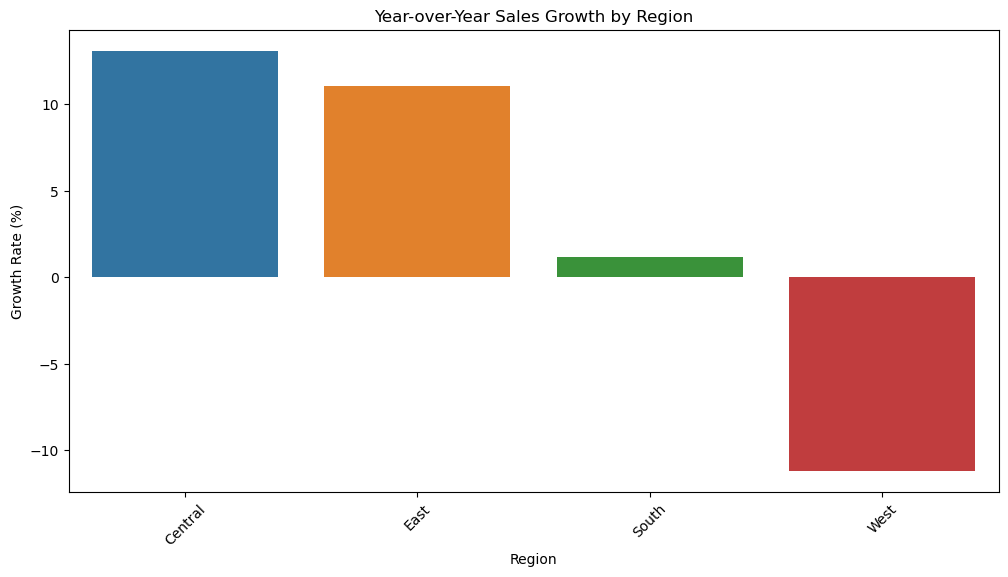

In [22]:
# Year-over-Year Sales Growth by Region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='growth_rate', data=region_sales_pivot)
plt.title('Year-over-Year Sales Growth by Region')
plt.xlabel('Region')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.show()


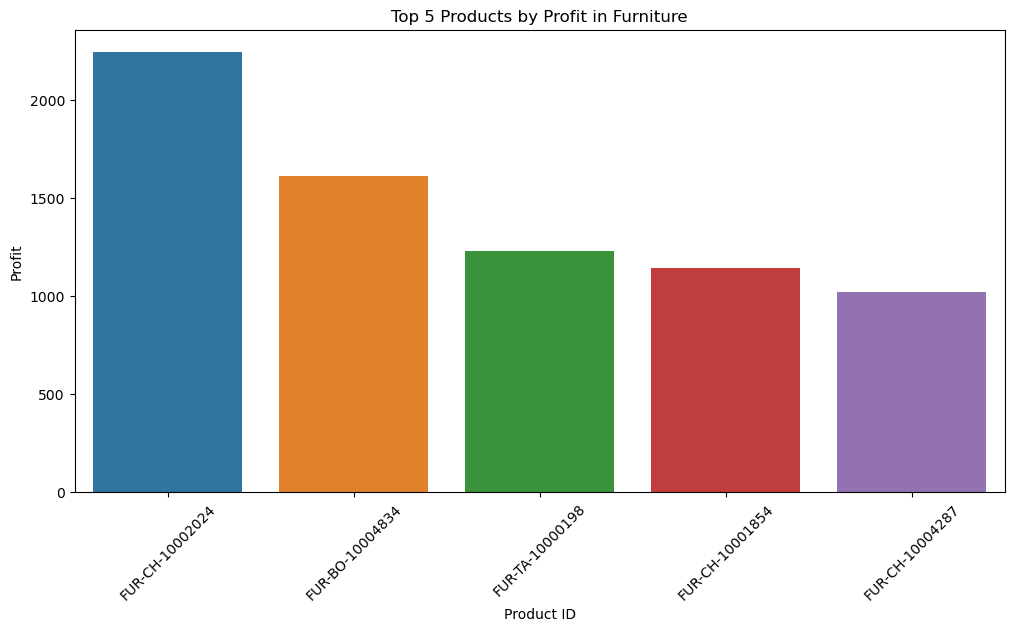

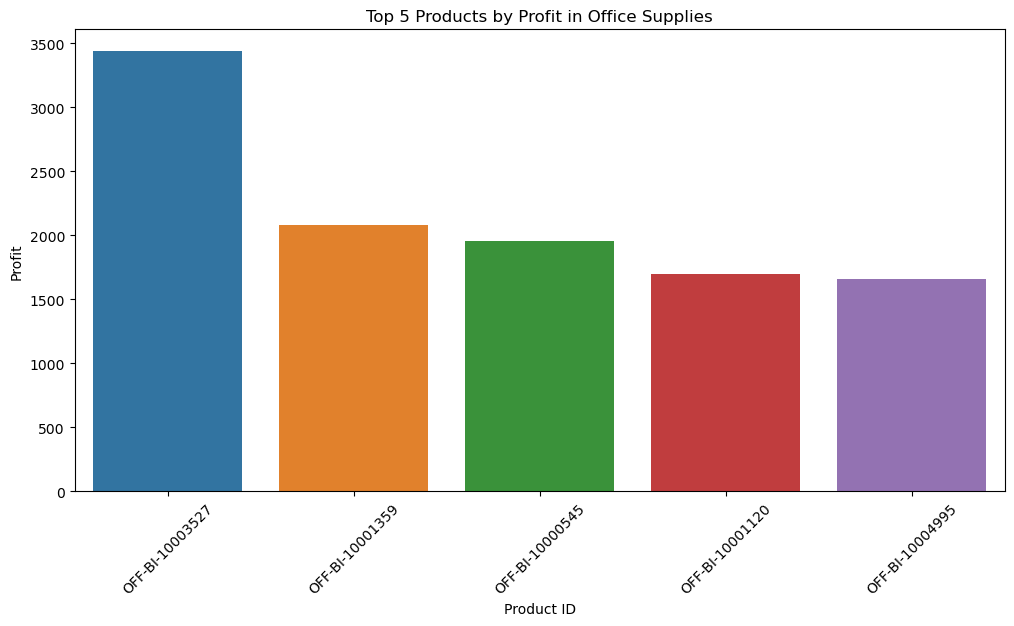

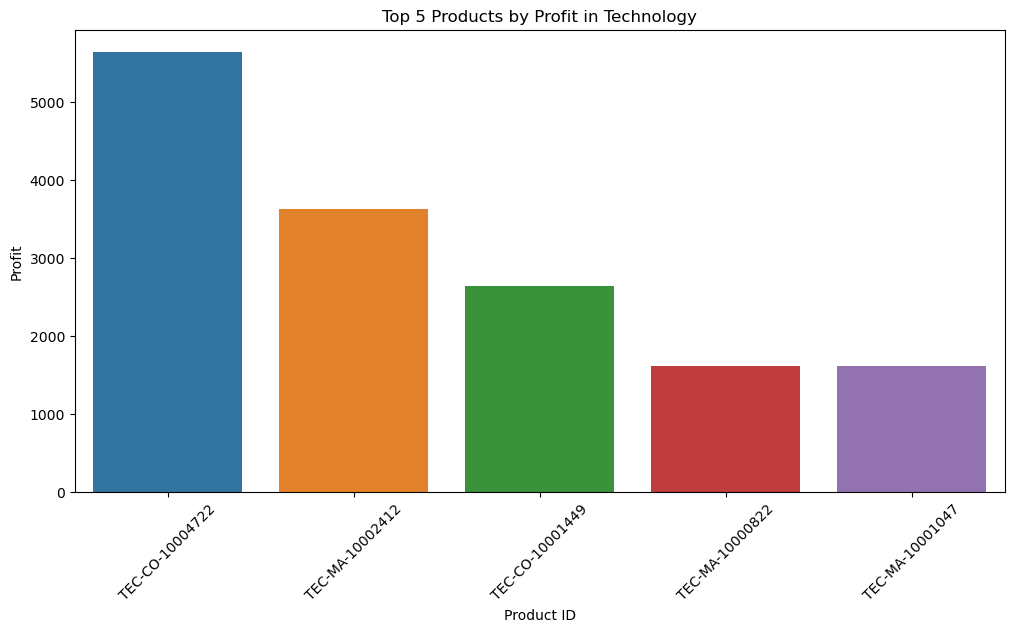

In [23]:
categories = top_5_products_by_profit['category'].unique()

for category in categories:
    subset = top_5_products_by_profit[top_5_products_by_profit['category'] == category]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='product_id', y='profit', data=subset)
    plt.title(f'Top 5 Products by Profit in {category}')
    plt.xlabel('Product ID')
    plt.ylabel('Profit')
    plt.xticks(rotation=45)
    plt.show()


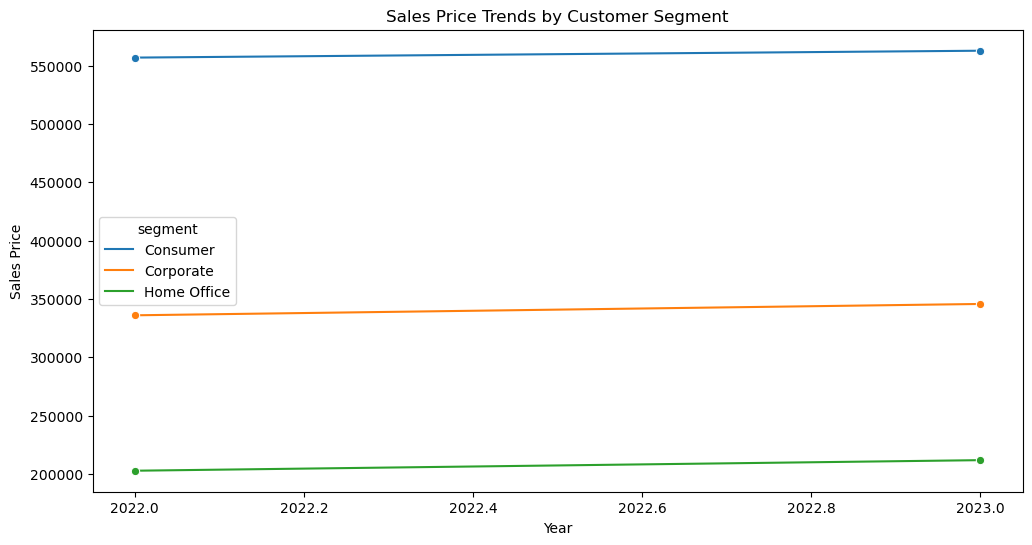

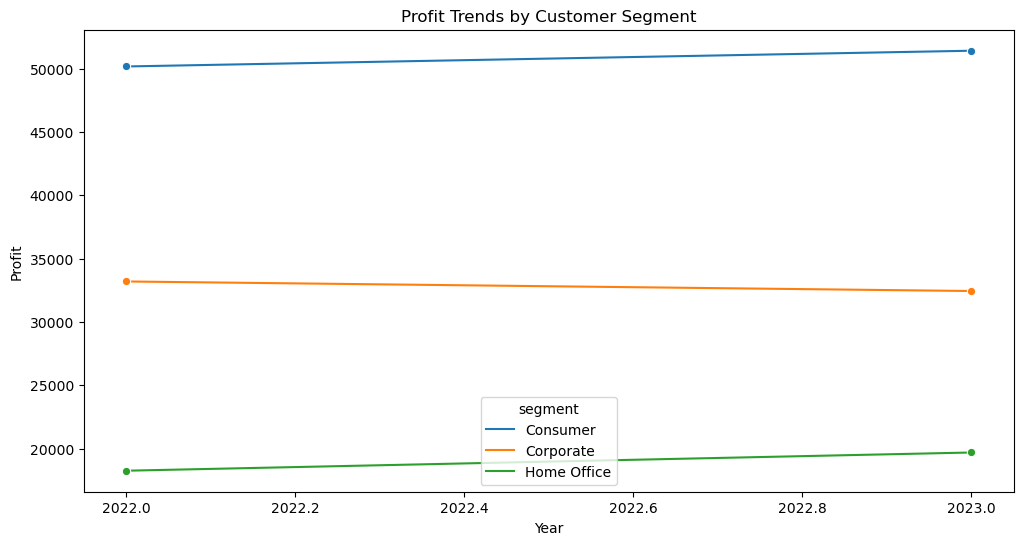

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='sales_price', hue='segment', data=segment_analysis, marker='o')
plt.title('Sales Price Trends by Customer Segment')
plt.xlabel('Year')
plt.ylabel('Sales Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='profit', hue='segment', data=segment_analysis, marker='o')
plt.title('Profit Trends by Customer Segment')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()


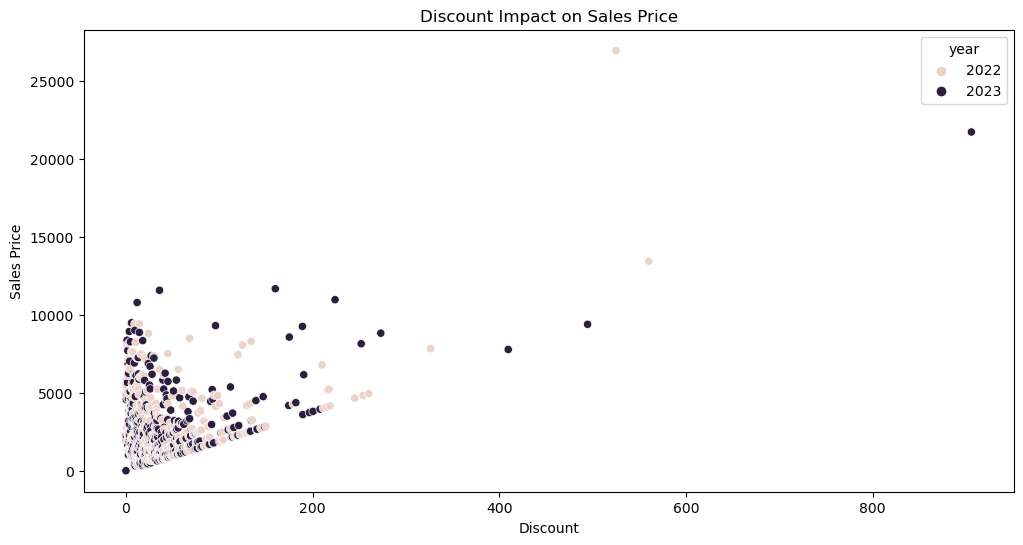

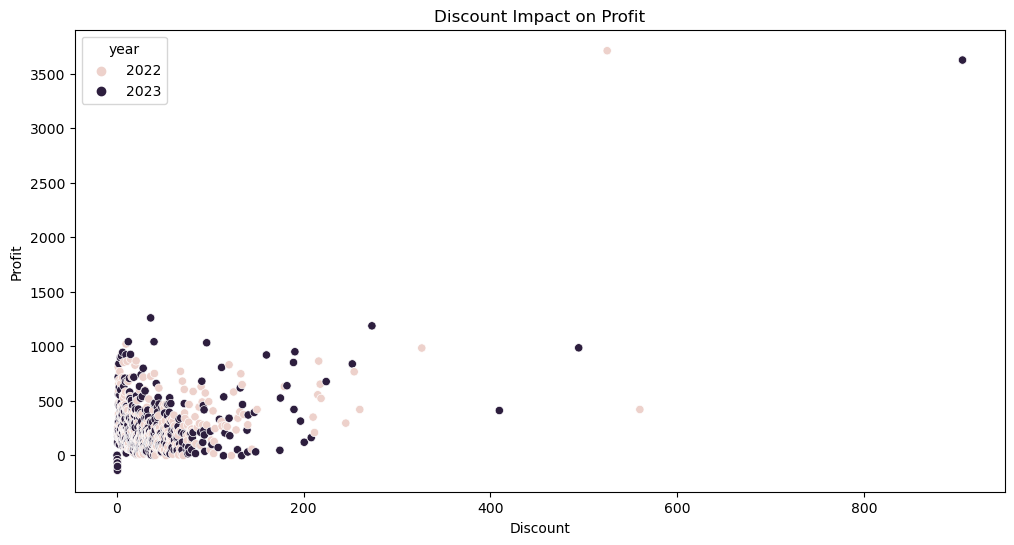

In [25]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount', y='sales_price', hue='year', data=discount_impact)
plt.title('Discount Impact on Sales Price')
plt.xlabel('Discount')
plt.ylabel('Sales Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount', y='profit', hue='year', data=discount_impact)
plt.title('Discount Impact on Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


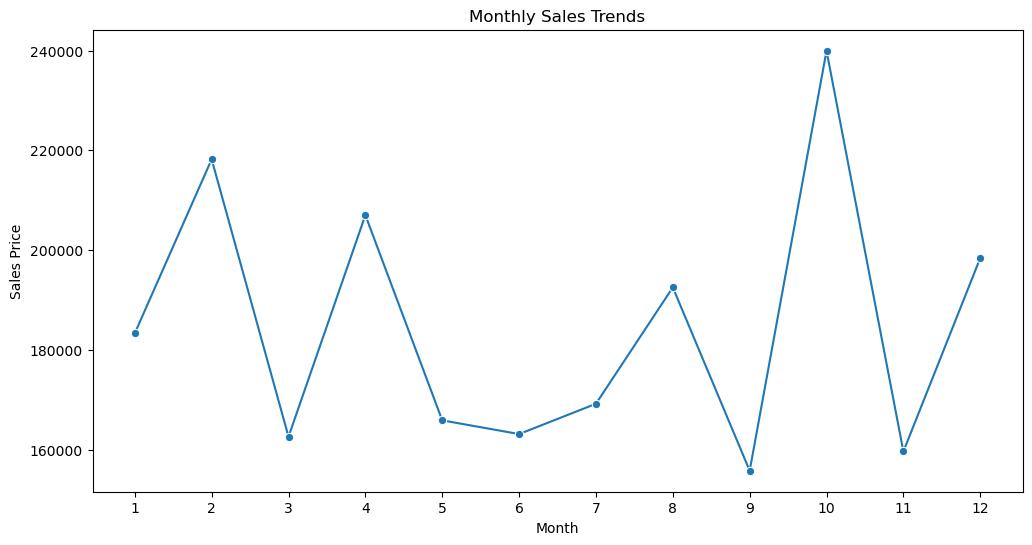

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='sales_price', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Sales Price')
plt.xticks(range(1, 13))
plt.show()


In [27]:
# Assuming the processed data is in DataFrame 'region_sales_pivot' from the Year-over-Year Sales Growth by Region analysis
region_sales_pivot.to_csv('region_sales_pivot.csv', index=False)

# Similarly, export other processed data
top_5_products_by_profit.to_csv('top_5_products_by_profit.csv', index=False)
segment_analysis.to_csv('segment_analysis.csv', index=False)
discount_impact.to_csv('discount_impact.csv', index=False)
monthly_sales.to_csv('monthly_sales.csv', index=False)

In [28]:
df.to_csv('df_orders.csv')